## Домашнее задание

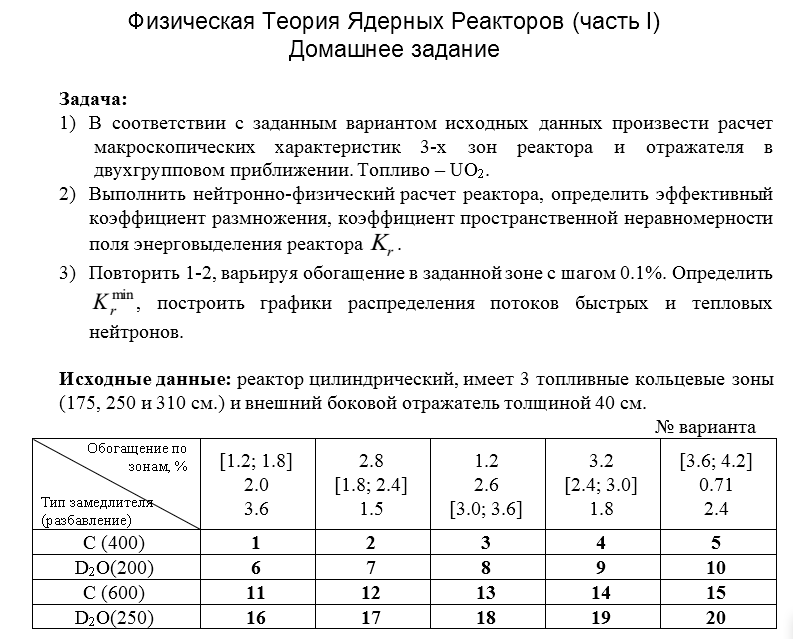

## Шаг1: Библиотека макроконстант

In [38]:
import numpy as np
import pandas as pd
import re 
import os
def Ginput(l,Rho):
    # нужно указать свой путь до лаб2
        with open('D:\\bin\\lab2.txt','r') as f:
            file = f.read()
        rex_input = re.compile(r' *[@ ] *\*?[UCHODtE]b?\d*\*? *[@=] *')
        k = 0
        for i in rex_input.findall(file):
            line = file.find(i)+len(i)
            j = 0
            prev = ''
            while(file[line+j] != ','):
                prev += file[line+j]
                j+=1
            a = '%.03e'%Rho[Rho.columns[3:][k]][l]
            file = file.replace(i+prev,i+a)
            k+=1
        with open('D:\\bin\\lab2.txt','w') as f:
            f.write(file)

def Goutput1(l,output_dict,Rho): 
    #там где чдир нужно указать путь до гетера.exe
    os.chdir('D:\\bin\\')
    os.system('getera.exe')
    with open('D:\\bin\\lab2.out') as f:
        file = f.read()
    line = file.find(output_dict)+len(output_dict)    
    j = 0
    prev = ['','']
    p = 0
    while(p < 2):
        prev[p] += file[line+j]
        j+=1
        if(file[line+j] == '\n'):
            p+=1
    for k in [0,1]:
        prev[k] = prev[k].split(' ')
        prev1=[]
        j = 0
        for j in prev[k]:
            if (j == '' or j ==' ' or j=='   ' ):
                continue
            else:
                prev1.append(j)
        Rho.loc[l,'Stot%d'%(k+1)]= float(prev1[2+k])
        Rho.loc[l,'Sabs%d'%(k+1)] =float(prev1[3+k])
        Rho.loc[l,'Sfis%d'%(k+1)] =float(prev1[4+k])
        Rho.loc[l,'nuSf%d'%(k+1)] =float(prev1[5+k])
        Rho.loc[l,'D%d'%(k+1)] = prev1[6+k]
    with open('D:\\bin\\lab2.out','r') as f:
        file = f.read()
        
    xx = re.compile(r'i *1 *\d*.?\d* * *\d*.?\d*')
    Rho.loc[l,'S1>2'] = xx.findall(file)[0].split('     ')[2]
    return Rho


#Здесь нужно менять ----------------------
C = 200
ptop0 = 10.97*6.02*10**(23)/269.928
pzam01 = 1.1*6.02*10**(23)/20.028
Rho1 = pd.DataFrame({'x':[1.2,1.3,1.4,1.5,1.6,1.7,1.8,2.0,3.6,3.6]})
Rho1['pzam'] = C*pzam01*ptop0/(C*ptop0+pzam01)
Rho1['ptop'] = pzam01*ptop0/(C*ptop0+pzam01)
Rho1['T'] = 293.0
Rho1['p5'] = (Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['p8'] = (1-Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['pO'] = 2*Rho1.ptop*10**(-24)
Rho1['pD'] = 2*Rho1.pzam*10**(-24)
Rho1['pO*'] = Rho1.pzam*10**(-24)
#---------------------------------------------------------
output_dict1 = '*grp*flux 1/cm2c  * stotal      * sabs        * sfis.       * nu$sfis.    * 1/3*strans  *1/aver.veloci*aver power\n'

for l in np.arange(0,Rho1.x.shape[0]):
    Ginput(l,Rho1)
    #a = Goutput(l,output_dict1,Rho1)
    a = Goutput1(l,output_dict1,Rho1)
    
#Для отражателя    
Rho1.loc[9,'Stot1']=0.3272815 
Rho1.loc[9,'Stot2']=0.3446697
Rho1.loc[9,'Sabs1']=0.4614600E-04 
Rho1.loc[9,'Sabs2']=0.3474768E-04
Rho1.loc[9,'Sfis1'] =0.000000
Rho1.loc[9,'Sfis2'] =0.000000
Rho1.loc[9,'nuSf1'] =0.000000
Rho1.loc[9,'nuSf2'] =0.000000 
Rho1.loc[9,'D1'] = 1.281746
Rho1.loc[9,'D2'] = 1.425218
Rho1.loc[9,'S1>2'] = 0.1258716E-01
Rho1
# a - это таблица со значениями

,x,pzam,ptop,T,p5,p8,pO,pD,pO*,Stot1,Sabs1,Sfis1,nuSf1,D1,Stot2,Sabs2,Sfis2,nuSf2,D2,S1>2
0,1.2,3.284179e+22,1.642090e+20,293.0,0.000002,0.000162,0.000328,0.065684,0.032842,0.330138,0.001303,0.000035,0.000088,1.273826,0.347311,0.001545,0.000965,0.002347,1.414057,0.1145900
1,1.3,3.284179e+22,1.642090e+20,293.0,0.000002,0.000162,0.000328,0.065684,0.032842,0.330142,0.001307,0.000037,0.000093,1.273809,0.347078,0.001635,0.001043,0.002536,1.414468,0.1145677
2,1.4,3.284179e+22,1.642090e+20,293.0,0.000002,0.000162,0.000328,0.065684,0.032842,0.330144,0.001309,0.000039,0.000099,1.273799,0.346845,0.001724,0.001120,0.002725,1.414882,0.1145482
3,1.5,3.284179e+22,1.642090e+20,293.0,0.000002,0.000162,0.000328,0.065684,0.032842,0.330146,0.001312,0.000042,0.000105,1.273789,0.346616,0.001813,0.001197,0.002912,1.415282,0.1145291
4,1.6,3.284179e+22,1.642090e+20,293.0,0.000003,0.000162,0.000328,0.065684,0.032842,0.330150,0.001315,0.000044,0.000110,1.273772,0.346388,0.001901,0.001274,0.003098,1.415674,0.1145069
5,1.7,3.284179e+22,1.642090e+20,293.0,0.000003,0.000161,0.000328,0.065684,0.032842,0.330152,0.001318,0.000046,0.000116,1.273762,0.346161,0.001990,0.001351,0.003285,1.416068,0.1144878
6,1.8,3.284179e+22,1.642090e+20,293.0,0.000003,0.000161,0.000328,0.065684,0.032842,0.330156,0.001321,0.000049,0.000121,1.273745,0.345938,0.002078,0.001427,0.003470,1.416445,0.1144659
7,2.0,3.284179e+22,1.642090e+20,293.0,0.000003,0.000161,0.000328,0.065684,0.032842,0.330160,0.001326,0.000053,0.000133,1.273725,0.345491,0.002252,0.001577,0.003836,1.417215,0.1144275
8,3.6,3.284179e+22,1.642090e+20,293.0,0.000006,0.000158,0.000328,0.065684,0.032842,0.330203,0.001371,0.000090,0.000222,1.273526,0.342130,0.003591,0.002737,0.006656,1.422768,0.1141043
9,3.6,3.284179e+22,1.642090e+20,293.0,0.000006,0.000158,0.000328,0.065684,0.032842,0.327282,0.000046,0.000000,0.000000,1.28175,0.344670,0.000035,0.000000,0.000000,1.42522,0.0125872


## Шаг 2 Расчет потоков и энерговыделений


In [39]:
import matplotlib.pyplot as pl

def itoa(DD):
    s=[]
    for i in np.arange(0,DD.shape[0]): 
        s.append(float(DD.values[i]))
    return(s)

def constantget(df):
    dff = pd.read_csv(r'D:\учебный склад\3 курс\ТЯР\ДЗ\constant.get',sep='\s+',header=None)
    dff[0] = df
    dff[1] = [Rho1.loc[7,'Sabs1'],Rho1.loc[7,'nuSf1'],Rho1.loc[7,'D1'],Rho1.loc[7,'Sabs2'],
                  Rho1.loc[7,'nuSf2'],Rho1.loc[7,'D2'],Rho1.loc[7,'S1>2']]
    dff[2] = [Rho1.loc[8,'Sabs1'],Rho1.loc[8,'nuSf1'],Rho1.loc[8,'D1'],Rho1.loc[8,'Sabs2'],
                  Rho1.loc[8,'nuSf2'],Rho1.loc[8,'D2'],Rho1.loc[8,'S1>2']]
    dff[3] = [Rho1.loc[9,'Sabs1'],Rho1.loc[9,'nuSf1'],Rho1.loc[9,'D1'],Rho1.loc[9,'Sabs2'],
                  Rho1.loc[9,'nuSf2'],Rho1.loc[9,'D2'],Rho1.loc[9,'S1>2']]
    dff.to_csv(r'D:\учебный склад\3 курс\ТЯР\ДЗ\constant.get',sep=' ',header=None,index = False)
    os.chdir(r'D:\учебный склад\3 курс\ТЯР\ДЗ')
    os.system('diffusion.exe')
    df1 = pd.read_csv(r'D:\учебный склад\3 курс\ТЯР\ДЗ\flux.dis',sep='\s+',header=None)
    df1.columns = ['x','F1','F2']
    keff = df1['F2'][-1:]
    df1 = df1[:-1]
    df1['x'] = itoa(df1['x'])
    df1['F1'] = itoa(df1['F1'])
    df1['F2'] = itoa(df1['F2'])
    return((df1,keff))


Fluxes = []
for i in (0,1,2,3,4,5,6):
    Fluxes.append(constantget([Rho1.loc[i,'Sabs1'],Rho1.loc[i,'nuSf1'],Rho1.loc[i,'D1'],Rho1.loc[i,'Sabs2'],
                  Rho1.loc[i,'nuSf2'],Rho1.loc[i,'D2'],Rho1.loc[i,'S1>2']]))
Energy = []
Kr = {'F1':[],'F2':[]}
for i in (0,1,2,3,4,5,6):
    Energy.append(pd.concat([ Fluxes[i][0][Fluxes[i][0]['x']<175]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][i]),'F2':float(Rho1['Sfis2'][i])}),
                                 Fluxes[i][0][Fluxes[i][0]['x']==175]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][i]),'F2':float(Rho1['Sfis2'][i])}),
                                 Fluxes[i][0][Fluxes[i][0]['x']==175]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][7]),'F2':float(Rho1['Sfis2'][7])}),
                                Fluxes[i][0][(Fluxes[i][0]['x']>175)&(Fluxes[i][0]['x']<250)]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][7]),'F2':float(Rho1['Sfis2'][7])}),
                                Fluxes[i][0][Fluxes[i][0]['x']==250]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][7]),'F2':float(Rho1['Sfis2'][7])}),
                                Fluxes[i][0][Fluxes[i][0]['x']==250]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][8]),'F2':float(Rho1['Sfis2'][8])}),
                                Fluxes[i][0][(Fluxes[i][0]['x']>250)&(Fluxes[i][0]['x']<310)]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][8]),'F2':float(Rho1['Sfis2'][8])})  ,
                            Fluxes[i][0][Fluxes[i][0]['x']==310]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][8]),'F2':float(Rho1['Sfis2'][8])}),
                            Fluxes[i][0][Fluxes[i][0]['x']==310]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][9]),'F2':float(Rho1['Sfis2'][9])}),
                            Fluxes[i][0][Fluxes[i][0]['x']>310]*pd.Series({'x':1,'F1':float(Rho1['Sfis1'][9]),'F2':float(Rho1['Sfis2'][9])})],
                            ignore_index = True))
    Kr['F1'].append(Energy[i]['F1'].max()/Energy[i]['F1'].mean())
    Kr['F2'].append(Energy[i]['F2'].max()/Energy[i]['F2'].mean())

## Шаг 3 Графики

In [3]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

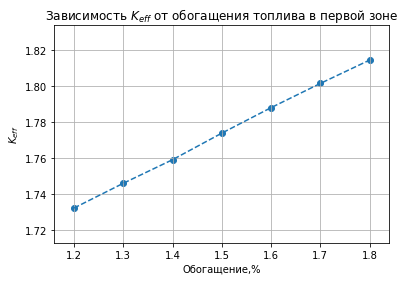

In [40]:
pl.title('Зависимость $K_{eff}$ от обогащения топлива в первой зоне')
pl.xlabel('Обогащение,%')
pl.ylabel('$K_{eff}$')
pl.grid()
pl.scatter(Rho1['x'][:-3],[Fluxes[0][1].values,Fluxes[1][1].values,Fluxes[2][1].values,Fluxes[3][1].values,Fluxes[4][1].values,Fluxes[5][1].values,Fluxes[6][1].values])
pl.plot(Rho1['x'][:-3],[Fluxes[0][1].values,Fluxes[1][1].values,Fluxes[2][1].values,Fluxes[3][1].values,Fluxes[4][1].values,Fluxes[5][1].values,Fluxes[6][1].values],linestyle='--')
pl.savefig('Keff.png',dpi = 1000)

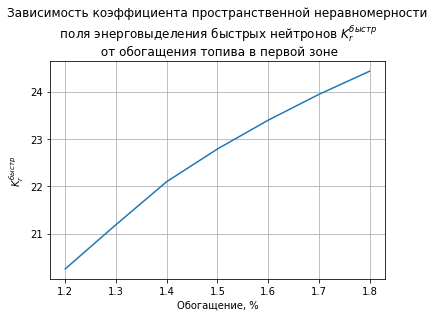

In [34]:
#pl.title('Завиcимость коэффициента пространственной неравномерности\n поля энерговыделения быстрых нейтронов $K_r^{быстр}$ \n от обогащения топива в первой зоне')
pl.grid()
pl.xlabel('Обогащение, %')
pl.ylabel('$K_r^{быстр}$')
pl.plot(Rho1['x'][:-3],Kr['F1'])
pl.title('Завиcимость коэффициента пространственной неравномерности\n поля энерговыделения быстрых нейтронов $K_r^{быстр}$ \n от обогащения топива в первой зоне')
pl.savefig('Kr1.png',dpi = 1000,)

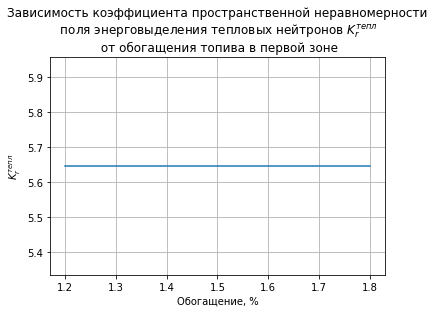

In [30]:
pl.title('Завиcимость коэффициента пространственной неравномерности\n поля энерговыделения тепловых нейтронов $K_r^{тепл}$ \n от обогащения топива в первой зоне')
pl.grid()
pl.xlabel('Обогащение, %')
pl.ylabel('$K_r^{тепл}$')
pl.plot(Rho1['x'][:-3],Kr['F2'])
pl.savefig('Kr2.png',dpi = 1000)

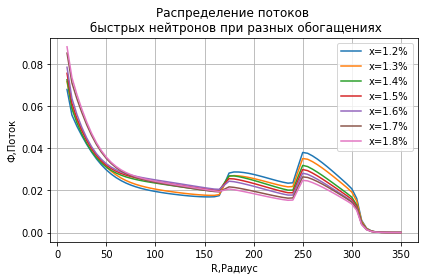

In [346]:
q = 2
pl.title('Распределение потоков \n быстрых нейтронов при разных обогащениях')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[0][0]['F1'][q:],label = 'x=1.2%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[1][0]['F1'][q:],label = 'x=1.3%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[2][0]['F1'][q:],label = 'x=1.4%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[3][0]['F1'][q:],label = 'x=1.5%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[4][0]['F1'][q:],label = 'x=1.6%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[5][0]['F1'][q:],label = 'x=1.7%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[6][0]['F1'][q:],label = 'x=1.8%')
pl.xlabel("R,Радиус")
pl.ylabel("Ф,Поток")
pl.legend()
pl.grid()
pl.savefig('Fbistr.png',dpi = 1000)

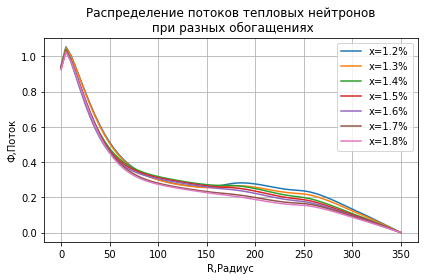

In [343]:
q = 0
pl.title('Распределение потоков тепловых нейтронов\n при разных обогащениях')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[0][0]['F2'][q:],label = 'x=1.2%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[1][0]['F2'][q:],label = 'x=1.3%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[2][0]['F2'][q:],label = 'x=1.4%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[3][0]['F2'][q:],label = 'x=1.5%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[4][0]['F2'][q:],label = 'x=1.6%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[5][0]['F2'][q:],label = 'x=1.7%')
pl.plot(Fluxes[0][0]['x'][q:],Fluxes[6][0]['F2'][q:],label = 'x=1.8%')
pl.legend()
#pl.text(105,0.8,'Распределение потоков\nтепловых нейтронов\nпри разных обогащениях')
pl.ylabel('Ф,Поток')
pl.xlabel('R,Радиус')
pl.grid()
pl.savefig('Fteplo.png',dpi = 1000)

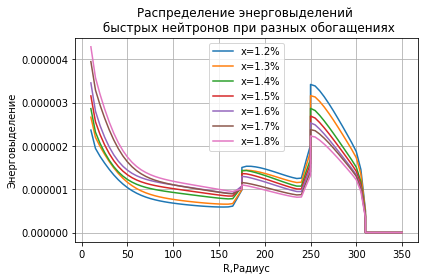

In [344]:
q = 2
pl.plot(Energy[0]['x'][q:],Energy[0]['F1'][q:],label = 'x=1.2%')
pl.plot(Energy[1]['x'][q:],Energy[1]['F1'][q:],label = 'x=1.3%')
pl.plot(Energy[2]['x'][q:],Energy[2]['F1'][q:],label = 'x=1.4%')
pl.plot(Energy[3]['x'][q:],Energy[3]['F1'][q:],label = 'x=1.5%')
pl.plot(Energy[4]['x'][q:],Energy[4]['F1'][q:],label = 'x=1.6%')
pl.plot(Energy[5]['x'][q:],Energy[5]['F1'][q:],label = 'x=1.7%')
pl.plot(Energy[6]['x'][q:],Energy[6]['F1'][q:],label = 'x=1.8%')
pl.title('Распределение энерговыделений \n быстрых нейтронов при разных обогащениях')
pl.legend()
pl.ylabel('Энерговыделение')
pl.xlabel('R,Радиус')
pl.grid()
pl.savefig('Ebistr.png',dpi = 1000)

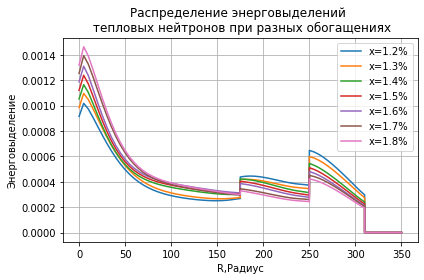

In [347]:
q = 0
pl.plot(Energy[0]['x'][q:],Energy[0]['F2'][q:],label = 'x=1.2%')
pl.plot(Energy[1]['x'][q:],Energy[1]['F2'][q:],label = 'x=1.3%')
pl.plot(Energy[2]['x'][q:],Energy[2]['F2'][q:],label = 'x=1.4%')
pl.plot(Energy[3]['x'][q:],Energy[3]['F2'][q:],label = 'x=1.5%')
pl.plot(Energy[4]['x'][q:],Energy[4]['F2'][q:],label = 'x=1.6%')
pl.plot(Energy[5]['x'][q:],Energy[5]['F2'][q:],label = 'x=1.7%')
pl.plot(Energy[6]['x'][q:],Energy[6]['F2'][q:],label = 'x=1.8%')
pl.title('Распределение энерговыделений \n тепловых нейтронов при разных обогащениях')
pl.legend()
pl.ylabel('Энерговыделение')
pl.xlabel('R,Радиус')
pl.grid()
pl.savefig('Eteplo.png',dpi = 1000)